### 実験結果をまとめる


In [111]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.io as pio
import SimpleITK as sitk
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import os
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

sns.set(font_scale=1.5)

pd.set_option('display.max_columns', 100)
plt.rcParams["font.size"] = 18
plt.rcParams["font.weight"] = 800

In [112]:
csv_path='/home/kakeya/Downloads/logs/2019-10-31_11-34/epoch_results.csv'
df=pd.read_csv(csv_path)
df.head()

,epoch,angioma_dice,bg_dice,cyst_dice,hcc_dice,loss,val_angioma_dice,val_bg_dice,val_cyst_dice,val_hcc_dice,val_loss
0,0,0.222555,0.965165,0.487061,0.859407,0.004177,0.261968,0.960575,0.556645,0.878735,0.004068
1,1,0.286682,0.976932,0.598283,0.891779,0.003009,0.337238,0.970849,0.616840,0.897509,0.003498
2,2,0.304643,0.980066,0.641470,0.903068,0.002627,0.270312,0.970626,0.612743,0.895221,0.003661
3,3,0.323727,0.982095,0.670564,0.910250,0.002378,0.310402,0.970786,0.622374,0.903976,0.003394
4,4,0.334744,0.983104,0.687324,0.914802,0.002224,0.335980,0.974257,0.654955,0.904490,0.003181


In [ ]:
statistics_path='/home/kakeya/Desktop/higuchi/20191021/output/statistics.csv'
st_df=pd.read_csv(statistics_path,index_col=0).rename(columns={'index':'cid'})
st_df=st_df.reset_index()

In [117]:
def acc_plot(df,save_path=None,cols=['val_hcc_dice','val_cyst_dice','val_angioma_dice'],legends=['kidney','cyst','ccrcc']):
    fig=plt.figure(figsize=(8,6))
    ax=fig.add_subplot(111)
    for col,legend in zip(cols,legends):
        ax.plot(df[col],label=legend)
    ax.set_xlabel('plot')
    ax.set_ylabel('Dice')
    plt.legend()
    plt.tight_layout()
    if save_path!=None:
        plt.savefig(save_path)
    plt.show()

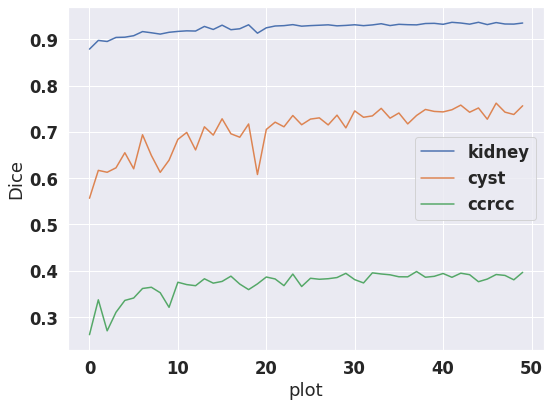

In [118]:
acc_plot(df,'../Keras/experiments/1104_75epochs/plot/dice.png')

In [119]:
csv_path='/home/kakeya/Desktop/higuchi/20191021/Keras/experiments/1104_75epochs/lesion_evaluation.csv'
df=pd.read_csv(csv_path)

In [120]:
def preprocess_lesion_df(df):
    '''lesion_dfの前処理'''
    preprocess=lambda x:int(x.split('.')[0])
    df['cid']=df['filename'].apply(preprocess)
    df.loc[df['existence'].str.contains('0'),['existence','dice','recall','precision']]='0'
    df.loc[df['existence'].str.contains('1'),'existence']='1'
    df['existence']=df['existence'].astype(int)
    df['label_name']=df['label_name'].replace({'HCC': 'kidney', 'cyst': 'CCRCC','angioma':'Cyst'})
    df.iloc[:,3:6]=df.iloc[:,3:6].astype(float)
    return df

In [121]:
df=preprocess_lesion_df(df)

In [178]:
def plot_whole_lesion_dice(df,save_dir=None):
    '''全症例に対してDiceスコアを出力する'''
    sns.set(style="whitegrid")
    plt.figure(figsize=(14,5))
    sns.set(font_scale=1.5) 

    # df[df['label_name']=='cyst'].sort_values('dice')
    sns.barplot(x='cid',y='dice',data=df,hue='label_name')
    plt.legend(bbox_to_anchor=(1, 1))
    plt.tight_layout()
    if save_dir:
        plt.savefig(f'{save_dir}/whole_dice.png')
    plt.show()


In [179]:
def plot_each_lesion_dice(df,save_dir=None):
    for leison in ['kidney','CCRCC','Cyst']:
        plt.figure(figsize=(12,6))
        df2=df.query('existence==1 & label_name==@leison')[['dice','cid']].sort_values('dice').reset_index(drop=True)
        #df2=df.loc[df['label_name']==leison,['dice','cid']].sort_values('dice').reset_index(drop=True)
        plt.rcParams["font.size"] = 22
        sns.barplot(x='cid',data=df2,y='dice',order=df2['cid'],palette='GnBu_d')
        plt.title(f'{leison}_dice')
        plt.ylim(0,1)
        plt.tight_layout()
        if save_dir:
            plt.savefig(f'{save_dir}/{leison}_dice.png')
        plt.show()

In [174]:
df2=df.merge(st_df,how='left',on='cid')

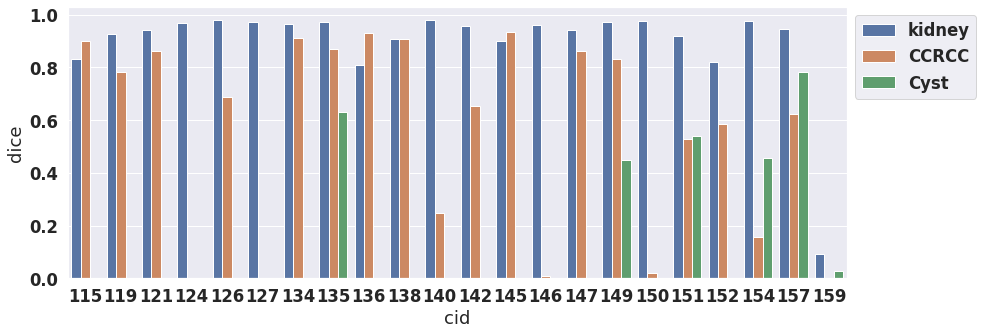

In [180]:
plot_whole_lesion_dice(df,save_dir='../output/EDA_result/1106')

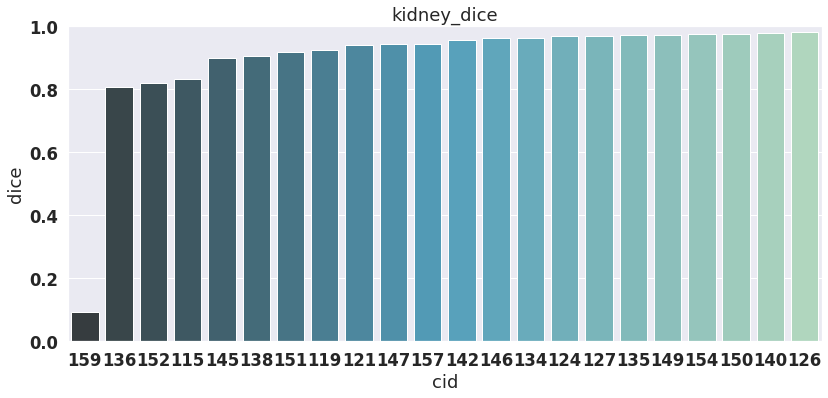

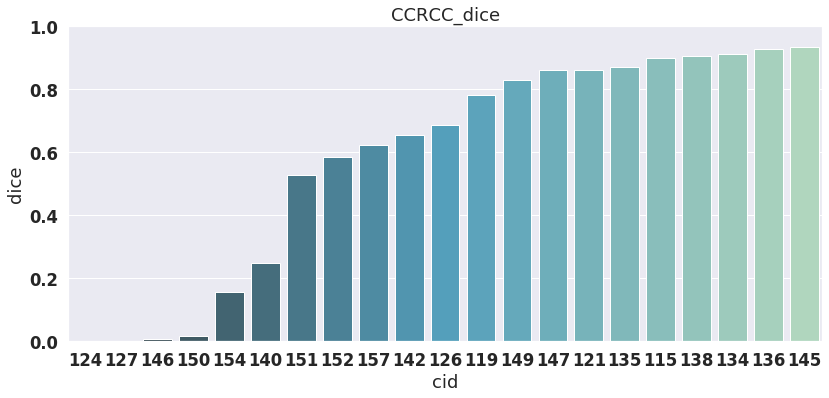

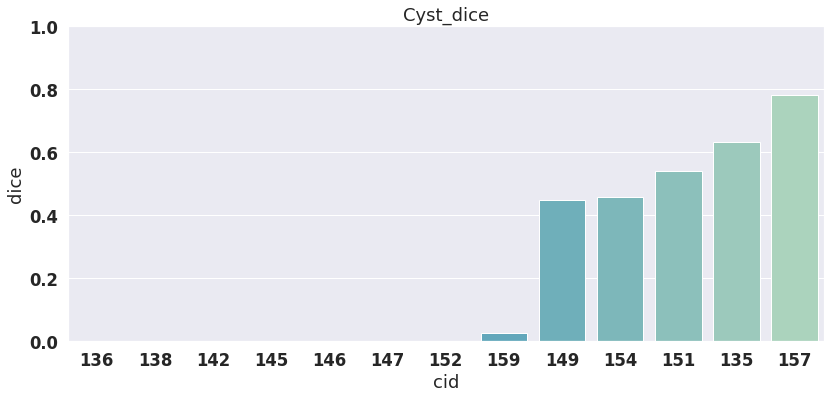

In [175]:
plot_each_lesion_dice(df,save_dir='../output/EDA_result/1106')

In [167]:
print('病変ごとの精度・ccrcc:',(ccr_df['dice']*ccr_df['count_CCR']).sum()/ccr_df['count_CCR'].sum())
print('病変ごとの精度・cyst:',(cys_df['dice']*cys_df['count_cys']).sum()/cys_df['count_cys'].sum())

病変ごとの精度・ccrcc: 0.8805256826992328
病変ごとの精度・cyst: 0.5137988029761548


In [184]:
df2

,filename,label_name,existence,dice,recall,precision,cid,count,count_CCR,count_cys,shape_kid,shape_CCR,shape_cys,lumi_mean,lumi_std,lumi_max,lumi_min,lumi_mean_SE2_CCR,lumi_std_SE2_CCR,lumi_max_SE2_CCR,lumi_min_SE2_CCR,lumi_mean_SE2_cys,lumi_std_SE2_cys,lumi_max_SE2_cys,lumi_min_SE2_cys,lumi_mean_SE3_kid,lumi_std_SE3_kid,lumi_max_SE3_kid,lumi_min_SE3_kid,lumi_mean_SE3_CCR,lumi_std_SE3_CCR,lumi_max_SE3_CCR,lumi_min_SE3_CCR,lumi_mean_SE3_cys,lumi_std_SE3_cys,lumi_max_SE3_cys,lumi_min_SE3_cys
0,00115.nii.gz,kidney,1,0.832177,0.768084,0.907940,115,1082267,656521.0,NaN,74,67,0,123.579678,76.637332,437,-712,102.686414,62.743805,447.0,-98.0,NaN,NaN,NaN,NaN,114.684204,57.570915,380.93555,-612.71970,94.753426,45.247917,389.06190,-83.44916,NaN,NaN,NaN,NaN
1,00115.nii.gz,CCRCC,1,0.900275,0.975760,0.835631,115,1082267,656521.0,NaN,74,67,0,123.579678,76.637332,437,-712,102.686414,62.743805,447.0,-98.0,NaN,NaN,NaN,NaN,114.684204,57.570915,380.93555,-612.71970,94.753426,45.247917,389.06190,-83.44916,NaN,NaN,NaN,NaN
2,00115.nii.gz,Cyst,0,0.000000,0.000000,0.000000,115,1082267,656521.0,NaN,74,67,0,123.579678,76.637332,437,-712,102.686414,62.743805,447.0,-98.0,NaN,NaN,NaN,NaN,114.684204,57.570915,380.93555,-612.71970,94.753426,45.247917,389.06190,-83.44916,NaN,NaN,NaN,NaN
3,00119.nii.gz,kidney,1,0.924768,0.936980,0.912871,119,417529,96392.0,NaN,52,27,0,102.187321,69.592302,286,-185,71.821832,39.800081,250.0,-132.0,NaN,NaN,NaN,NaN,93.891075,54.144110,228.12500,-128.96759,62.959137,26.915474,163.13013,-108.40259,NaN,NaN,NaN,NaN
4,00119.nii.gz,CCRCC,1,0.783225,0.731036,0.843440,119,417529,96392.0,NaN,52,27,0,102.187321,69.592302,286,-185,71.821832,39.800081,250.0,-132.0,NaN,NaN,NaN,NaN,93.891075,54.144110,228.12500,-128.96759,62.959137,26.915474,163.13013,-108.40259,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,00157.nii.gz,CCRCC,1,0.623109,0.854944,0.490186,157,947520,10720.0,141995.0,128,23,92,133.893274,98.163740,459,-299,150.477892,40.490853,272.0,-58.0,14.325547,53.894052,340.0,-324.0,139.993970,89.565780,379.50720,-251.71307,108.617676,32.970383,250.22400,-38.96118,18.139643,56.194897,279.33300,-274.71454
62,00157.nii.gz,Cyst,1,0.781895,0.756956,0.808533,157,947520,10720.0,141995.0,128,23,92,133.893274,98.163740,459,-299,150.477892,40.490853,272.0,-58.0,14.325547,53.894052,340.0,-324.0,139.993970,89.565780,379.50720,-251.71307,108.617676,32.970383,250.22400,-38.96118,18.139643,56.194897,279.33300,-274.71454
63,00159.nii.gz,kidney,1,0.092330,0.049975,0.605452,159,222267,NaN,78706.0,41,0,41,27.597880,58.103993,266,-993,NaN,NaN,NaN,NaN,32.077008,52.413864,203.0,-116.0,32.055405,50.166603,232.57434,-985.21310,NaN,NaN,NaN,NaN,33.943863,42.456436,131.14844,-97.77692
64,00159.nii.gz,CCRCC,0,0.000000,0.000000,0.000000,159,222267,NaN,78706.0,41,0,41,27.597880,58.103993,266,-993,NaN,NaN,NaN,NaN,32.077008,52.413864,203.0,-116.0,32.055405,50.166603,232.57434,-985.21310,NaN,NaN,NaN,NaN,33.943863,42.456436,131.14844,-97.77692


In [189]:
ccr_cols=[col for col in df2.columns if  'CCR' in col]
cys_cols=[col for col in df2.columns if  'cys' in col]
important_cols=['cid','dice','recall','precision','count','lumi_mean']


ccr_df=df2.query('existence==1 & label_name=="CCRCC"')[important_cols+ccr_cols]
ccr_df.head()
cys_df=df2.query('existence==1 & label_name=="Cyst"')[important_cols+cys_cols]

In [190]:
ccr_df['log_kid']=np.log10(ccr_df['count']+1)
ccr_df['log_ccr']=np.log10(ccr_df['count_CCR']+1)
ccr_df['round_dice']=np.round(ccr_df['dice'],3)
cys_df['log_kid']=np.log10(cys_df['count']+1)
cys_df['log_cys']=np.log10(cys_df['count_cys']+1)
cys_df['round_dice']=np.round(cys_df['dice'],3)

In [198]:
ccr_df

,cid,dice,recall,precision,count,lumi_mean,count_CCR,shape_CCR,lumi_mean_SE2_CCR,lumi_std_SE2_CCR,lumi_max_SE2_CCR,lumi_min_SE2_CCR,lumi_mean_SE3_CCR,lumi_std_SE3_CCR,lumi_max_SE3_CCR,lumi_min_SE3_CCR,log_kid,log_ccr,round_dice
1,115,0.900275,0.975760,0.835631,1082267,123.579678,656521.0,67,102.686414,62.743805,447.0,-98.0,94.753426,45.247917,389.06190,-83.449160,6.034335,5.817249,0.900
4,119,0.783225,0.731036,0.843440,417529,102.187321,96392.0,27,71.821832,39.800081,250.0,-132.0,62.959137,26.915474,163.13013,-108.402590,5.620688,4.984045,0.783
7,121,0.862743,0.819587,0.910697,590766,117.015414,159229.0,46,117.328439,52.001724,272.0,-89.0,110.954610,36.069893,204.49329,-72.334960,5.771416,5.202025,0.863
10,124,0.000000,0.000000,0.000000,257499,158.450363,699.0,4,131.470672,47.507189,272.0,-37.0,142.319460,45.704456,230.89404,-28.162842,5.410777,2.845098,0.000
13,126,0.686697,0.547372,0.921166,581488,129.052146,6639.0,12,41.610634,52.802280,246.0,-117.0,50.748394,50.034130,200.86682,-114.393070,5.764542,3.822168,0.687
16,127,0.000000,0.000000,0.000000,341765,114.909110,637.0,5,128.767661,33.938295,210.0,40.0,161.019650,11.982380,190.63037,102.321170,5.533729,2.804821,0.000
19,134,0.911655,0.927981,0.895892,441912,146.642447,46960.0,22,159.951980,76.464656,353.0,-118.0,100.348130,37.983050,210.72119,-101.938290,5.645337,4.671737,0.912
22,135,0.869787,0.907640,0.834965,353302,138.689495,5262.0,11,156.980426,49.590656,276.0,-84.0,126.728050,32.834297,207.83948,-62.349915,5.548147,3.721233,0.870
25,136,0.929431,0.940949,0.918191,1855627,66.740063,1410687.0,92,60.634713,41.436145,309.0,-92.0,61.335835,32.735596,273.50305,-165.188540,6.268491,6.149431,0.929
28,138,0.905337,0.967656,0.850560,315781,130.388573,114739.0,25,126.739470,62.404691,292.0,-80.0,96.601930,33.434280,189.39587,-94.613400,5.499387,5.059715,0.905


In [201]:
ccr_df.sort_values('lumi_std_SE2_CCR',ascending=False)[['cid','dice','count_CCR','lumi_std_SE2_CCR','lumi_std_SE3_CCR']]

,cid,dice,count_CCR,lumi_std_SE2_CCR,lumi_std_SE3_CCR
58,154,0.155695,1762.0,88.839488,56.279835
19,134,0.911655,46960.0,76.464656,37.983050
37,145,0.935411,304704.0,66.493851,34.088585
34,142,0.654568,34120.0,64.763994,38.781834
1,115,0.900275,656521.0,62.743805,45.247917
28,138,0.905337,114739.0,62.404691,33.434280
49,150,0.018283,4979.0,57.906114,33.714024
43,147,0.862499,53594.0,53.170985,27.177260
13,126,0.686697,6639.0,52.802280,50.034130
7,121,0.862743,159229.0,52.001724,36.069893


## Plot

### CCRCC

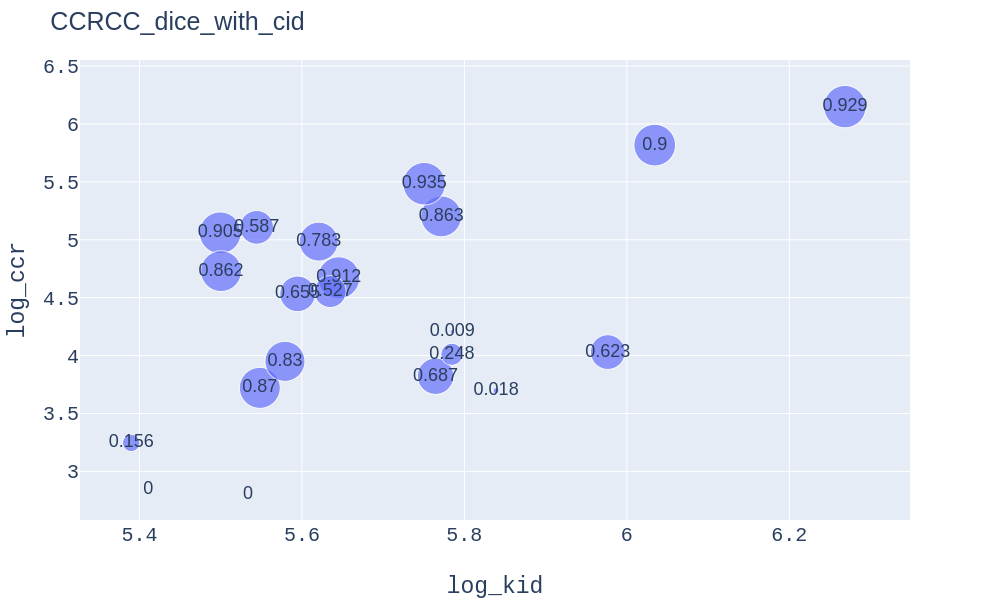

In [168]:
fig = px.scatter(ccr_df, x="log_kid", y="log_ccr",text='round_dice', size='round_dice',size_max=30,hover_name='cid')
fig.update_layout(title_text="CCRCC_dice_with_cid",titlefont={"size": 25},font={'size':18})
fig.update_xaxes(title_font=dict(size=23, family='Courier'))
fig.update_yaxes(tickfont=dict(family='Courier', size=20))
fig.update_xaxes(tickfont=dict(family='Courier', size=20))
fig.update_yaxes(title_font=dict(size=23, family='Courier'))
fig.show()

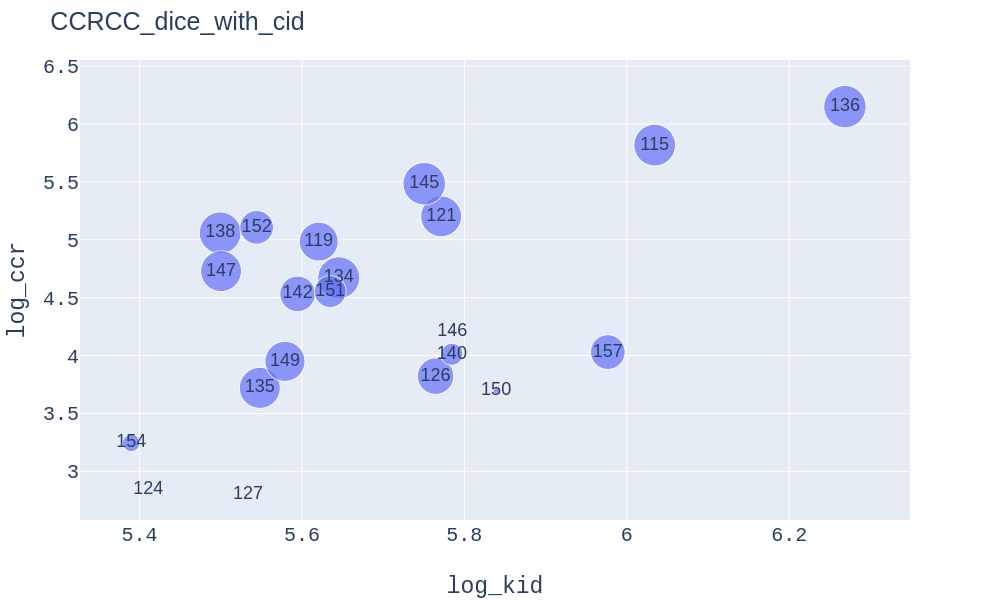

In [196]:
fig = px.scatter(ccr_df, x="log_kid", y="log_ccr",text='cid', size='round_dice',size_max=30,hover_name='round_dice')
fig.update_layout(title_text="CCRCC_dice_with_cid",titlefont={"size": 25},font={'size':18})
fig.update_xaxes(title_font=dict(size=23, family='Courier'))
fig.update_yaxes(tickfont=dict(family='Courier', size=20))
fig.update_xaxes(tickfont=dict(family='Courier', size=20))
fig.update_yaxes(title_font=dict(size=23, family='Courier'))
fig.show()

### cyst

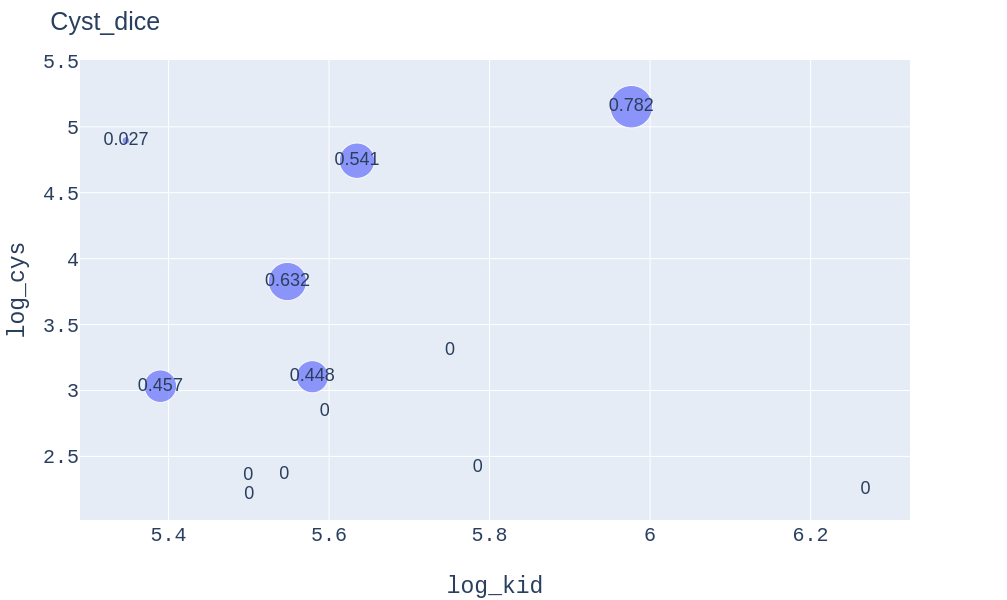

In [172]:
fig = px.scatter(cys_df, x="log_kid", y="log_cys",text='round_dice', size='round_dice',size_max=30,hover_name='cid')
fig.update_layout(title_text="Cyst_dice",titlefont={"size": 25},font={'size':18})
fig.update_xaxes(title_font=dict(size=23, family='Courier'))
fig.update_yaxes(tickfont=dict(family='Courier', size=20))
fig.update_xaxes(tickfont=dict(family='Courier', size=20))
fig.update_yaxes(title_font=dict(size=23, family='Courier'))
fig.show()

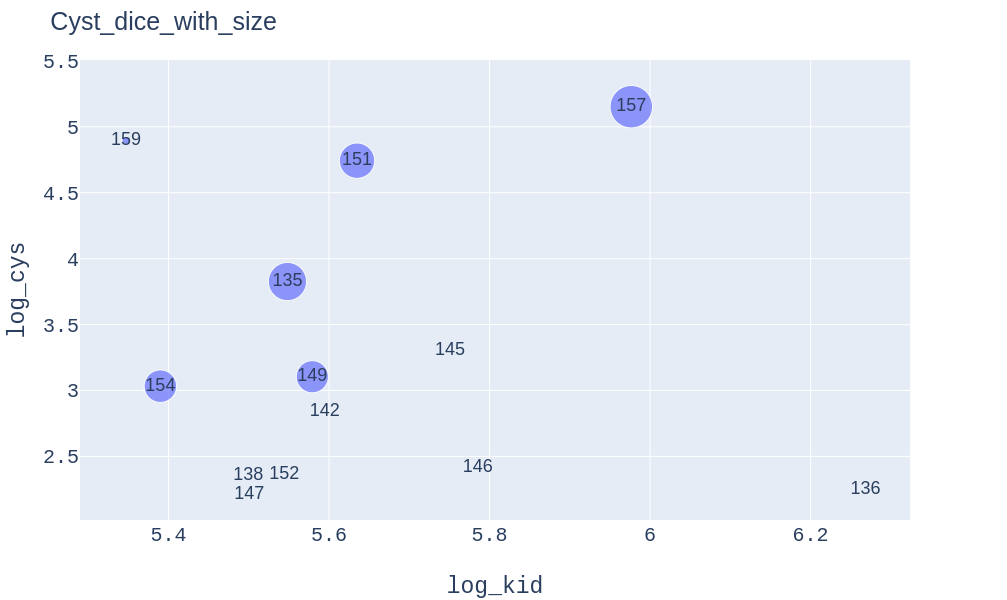

In [176]:
fig = px.scatter(cys_df, x="log_kid", y="log_cys",text='cid', size='round_dice',size_max=30,hover_name='cid')
fig.update_layout(title_text="Cyst_dice_with_size",titlefont={"size": 25},font={'size':18})
fig.update_xaxes(title_font=dict(size=23, family='Courier'))
fig.update_yaxes(tickfont=dict(family='Courier', size=20))
fig.update_xaxes(tickfont=dict(family='Courier', size=20))
fig.update_yaxes(title_font=dict(size=23, family='Courier'))
fig.show()